<a href="https://colab.research.google.com/github/juanalvarez96/shallow2deeplab2/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SECOND PART**

In [12]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 25.0MB 1.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 30.6MB 1.3MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
mypath25 = "/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/gtsrb-german-traffic-sign/Train/25"

In [0]:
# This is supposed to load all images from dataset
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow
import numpy
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
onlyfiles = [ f for f in listdir(mypath25) if isfile(join(mypath25,f)) ]
images = []
n = 0
for name in onlyfiles:
  images.append(cv2.imread( join(mypath25,name)))
  #print(cv2.imread( join(mypath,name)))

images25 = images
len(images25)


1500

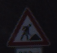

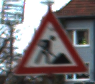

In [5]:
# Print two random images from the folder
rand1 = random.randint(0, len(images25))
rand2 = random.randint(0, len(images25))

img1 = images25[rand1]
img2 = images25[rand2]

cv2_imshow(img1)
cv2_imshow(img2)

Now we will compute the matches between these two images. To implement this, we will use the FLANN based matcher, since this one is faster.

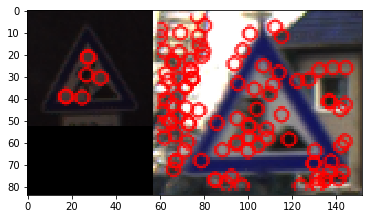

(<matplotlib.image.AxesImage at 0x7f233868f080>, None)

In [6]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=100)

# Prepare images
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# Load FLANN
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Compute matches
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()



Once we have the matches, we are going to consider that two images are very similar if they have a **high number of matches**. \\


In [7]:
# Get number of matches
print(len(matches))

7


Now that we have a way of loading images and printing a similarity metric (number of matches), we are going to try to see if the number of matches between two images of **the same family** can be lower than the matches between two images of **a different family membership**.

In [0]:
# Folders selected are 25 and 10. (These numbers could be different)
mypath25 = "/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/gtsrb-german-traffic-sign/Train/25"
mypath10 = "/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/gtsrb-german-traffic-sign/Train/10"


In [0]:
# Load all images from the two above-mentioned folders
onlyfiles25 = [ f for f in listdir(mypath25) if isfile(join(mypath25,f)) ]
images25 = []
n = 0
for name in onlyfiles25:
  images25.append(cv2.imread( join(mypath25,name)))
  #print(cv2.imread( join(mypath,name)))

onlyfiles10 = [ f for f in listdir(mypath10) if isfile(join(mypath10,f)) ]
images10 = []
n = 0
for name in onlyfiles10:
  images10.append(cv2.imread( join(mypath10,name)))
  #print(cv2.imread( join(mypath,name)))



In [0]:
# Print two random images from the same folder
rand1 = random.randint(0, len(images25))
rand2 = random.randint(0, len(images25))

img1 = images25[rand1]
img2 = images25[rand2]

cv2_imshow(img1)
cv2_imshow(img2)

# Print a random image from the other folder
rand3 = random.randint(0, len(images10))

img3 = images10[rand3]

cv2_imshow(img3)

In [10]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=100)

# Prepare images
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
kp3, des3 = sift.detectAndCompute(img3, None)

# Load FLANN
flann1 = cv2.FlannBasedMatcher(index_params,search_params)
flann2 = cv2.FlannBasedMatcher(index_params,search_params)

# Compute matches
matches12 = flann1.knnMatch(des1,des2,k=2)
matches23 = flann2.knnMatch(des2, des3, k =3)

if(len(matches23)-len(matches12))>0:
  print("There are more matches between images from a different class. Thesis proved!\n")
  print("{} matches between images of different families vs {} matches between images of the same class.".format(len(matches23), len(matches12)))
if(len(matches23)-len(matches12))<0:
  print("There are more matches between images from the same class. Retry running the code!\n")
  print("{} matches between images of different families vs {} matches between images of the same class.".format(len(matches23), len(matches12)))
else:
  print(" There are the same number of matches for the three images. Retry running the code!\n")



There are more matches between images from a different class. Thesis proved!

102 matches between images of different families vs 7 matches between images of the same class.
 There are the same number of matches for the three images. Retry running the code!

